In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
pd.set_option('display.max_rows', 500)

In [2]:
data_path = 'raw/JohnHopkins/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)

pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,897,897,897,907,907,918,922,925,925,925
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,880,916,932,950,1000,1078,1109,1148,1164,1199


In [3]:
print(pd_raw.columns[4:].tolist())

['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20', '4/20/20', '4/21/20', '4/22/20', '4/23/20', '4/

In [4]:
time_idx = pd_raw.columns[4:]

df_plot = pd.DataFrame({'Date': time_idx})
df_plot.head()

,Date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [5]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                              Austria
17                           Azerbaijan
18                              Bahamas
19                              Bahrain
20                           Bangladesh
21                             Barbados
22                              Belarus
23                              Belgium
24                                Benin


In [6]:
pd_raw[pd_raw['Country/Region']=='India'].iloc[:, 4:].sum(axis=0)

1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
1/27/20          0
1/28/20          0
1/29/20          0
1/30/20          1
1/31/20          1
2/1/20           1
2/2/20           2
2/3/20           3
2/4/20           3
2/5/20           3
2/6/20           3
2/7/20           3
2/8/20           3
2/9/20           3
2/10/20          3
2/11/20          3
2/12/20          3
2/13/20          3
2/14/20          3
2/15/20          3
2/16/20          3
2/17/20          3
2/18/20          3
2/19/20          3
2/20/20          3
2/21/20          3
2/22/20          3
2/23/20          3
2/24/20          3
2/25/20          3
2/26/20          3
2/27/20          3
2/28/20          3
2/29/20          3
3/1/20           3
3/2/20           5
3/3/20           5
3/4/20          28
3/5/20          30
3/6/20          31
3/7/20          34
3/8/20          39
3/9/20          43
3/10/20         56
3/11/20         62
3/12/20         73
3/13/20         82
3/14/20     

In [7]:
countryList = ['US', 'Brazil', 'Russia', 'India', 'Spain', 'United Kingdom', 
               'Italy', 'France', 'Germany', 'Peru', 'Iran', 'Turkey']

for country in countryList:
    df_plot[country] = np.array(pd_raw[pd_raw['Country/Region']==country].iloc[:, 4:].sum(axis=0))
    
df_plot.head()

,Date,US,Brazil,Russia,India,Spain,United Kingdom,Italy,France,Germany,Peru,Iran,Turkey
0,1/22/20,1,0,0,0,0,0,0,0,0,0,0,0
1,1/23/20,1,0,0,0,0,0,0,0,0,0,0,0
2,1/24/20,2,0,0,0,0,0,0,2,0,0,0,0
3,1/25/20,2,0,0,0,0,0,0,3,0,0,0,0
4,1/26/20,5,0,0,0,0,0,0,3,0,0,0,0


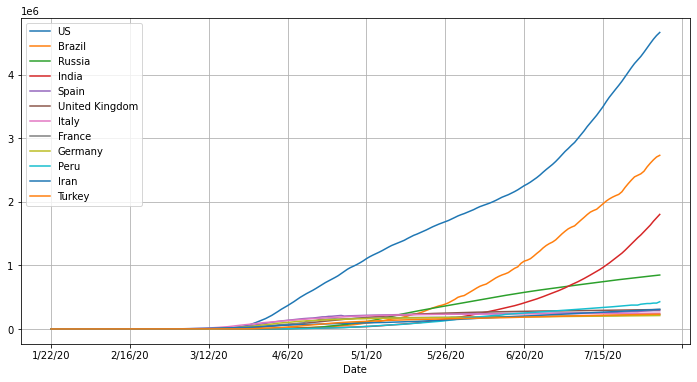

In [8]:
df_plot.set_index('Date').plot(figsize=(12,6), grid=True)

In [9]:
df_plot['Date'][0] # m d y US notation

'1/22/20'

In [10]:
datetime.strptime(df_plot['Date'][0], '%m/%d/%y')

datetime.datetime(2020, 1, 22, 0, 0)

In [11]:
time_idx = [datetime.strptime(date, '%m/%d/%y') for date in df_plot['Date']]

In [12]:
# [date for date in df_plot['Date']]

In [13]:
time_str = [date.strftime('%Y-%m-%d') for date in time_idx]

In [14]:
time_idx[0].strftime('%Y-%m-%d')

'2020-01-22'

In [15]:
df_plot['Date'] = time_idx
df_plot.head()

,Date,US,Brazil,Russia,India,Spain,United Kingdom,Italy,France,Germany,Peru,Iran,Turkey
0,2020-01-22,1,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,1,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-24,2,0,0,0,0,0,0,2,0,0,0,0
3,2020-01-25,2,0,0,0,0,0,0,3,0,0,0,0
4,2020-01-26,5,0,0,0,0,0,0,3,0,0,0,0


In [16]:
df_plot.to_csv('raw/JohnHopkins/processed/top_countries.csv', sep=',')

## Relational Data models, defining a primary key

primary key as state-country

In [63]:
# we bigin with the original dataset

In [70]:
data_path = 'raw/JohnHopkins/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)

pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,897,897,897,907,907,918,922,925,925,925
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,880,916,932,950,1000,1078,1109,1148,1164,1199


In [67]:
# pd_raw['Province/State'].unique()

In [65]:
# we separate the transition data (changing over time) from the static data (lat, long)

In [73]:
# DB: data base

pd_DB = pd_raw.rename(columns={'Province/State': 'state', 'Country/Region': 'country'})
pd_DB.drop(['Lat', 'Long'], axis=1, inplace=True)
pd_DB.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710
1,NaN,Albania,0,0,0,0,0,0,0,0,...,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,897,897,897,907,907,918,922,925,925,925
4,NaN,Angola,0,0,0,0,0,0,0,0,...,880,916,932,950,1000,1078,1109,1148,1164,1199


In [75]:
pd_DB.set_index(['state', 'country']).head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
state country                                                             
NaN   Afghanistan        0        0        0        0        0        0   
      Albania            0        0        0        0        0        0   
      Algeria            0        0        0        0        0        0   
      Andorra            0        0        0        0        0        0   
      Angola             0        0        0        0        0        0   

                   1/28/20  1/29/20  1/30/20  1/31/20  ...  7/24/20  7/25/20  \
state country                                          ...                     
NaN   Afghanistan        0        0        0        0  ...    35981    36036   
      Albania            0        0        0        0  ...     4570     4637   
      Algeria            0        0        0        0  ...    26159    26764   
      Andorra            0        0        0        0  ...      897      897   
      Angola             0        0        0        0  ...      880      916   

                   7/26/20  7/27/20  7/28/20  7/29/20  7/30/20  7/31/20  \
state country                                                             
NaN   Afghanistan    36157    36263    36368    36471    36542    36675   
      Albania         4763     4880     4997     5105     5197     5276   
      Algeria        27357    27973    28615    29229    29831    30394   
      Andorra          897      907      907      918      922      925   
      Angola           932      950     1000     1078     1109     1148   

                   8/1/20  8/2/20  
state country                      
NaN   Afghanistan   36710   36710  
      Albania        5396    5519  
      Algeria       30950   31465  
      Andorra         925     925  
      Angola         1164    1199  

[5 rows x 194 columns]

In [78]:
test_pd = pd_DB.set_index(['state', 'country']).transpose()
test_pd.head()

state           NaN                                                     \
country Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda   
1/22/20           0       0       0       0      0                   0   
1/23/20           0       0       0       0      0                   0   
1/24/20           0       0       0       0      0                   0   
1/25/20           0       0       0       0      0                   0   
1/26/20           0       0       0       0      0                   0   

state                     Australian Capital Territory New South Wales  ...  \
country Argentina Armenia                    Australia       Australia  ...   
1/22/20         0       0                            0               0  ...   
1/23/20         0       0                            0               0  ...   
1/24/20         0       0                            0               0  ...   
1/25/20         0       0                            0               0  ...   
1/26/20         0       0                            0               3  ...   

state      NaN Falkland Islands (Malvinas) Saint Pierre and Miquelon  \
country Malawi              United Kingdom                    France   
1/22/20      0                           0                         0   
1/23/20      0                           0                         0   
1/24/20      0                           0                         0   
1/25/20      0                           0                         0   
1/26/20      0                           0                         0   

state           NaN                                                     \
country South Sudan Western Sahara Sao Tome and Principe Yemen Comoros   
1/22/20           0              0                     0     0       0   
1/23/20           0              0                     0     0       0   
1/24/20           0              0                     0     0       0   
1/25/20           0              0                     0     0       0   
1/26/20           0              0                     0     0       0   

state                       
country Tajikistan Lesotho  
1/22/20          0       0  
1/23/20          0       0  
1/24/20          0       0  
1/25/20          0       0  
1/26/20          0       0  

[5 rows x 266 columns]

In [79]:
test_pd.columns

MultiIndex([(                           nan,           'Afghanistan'),
            (                           nan,               'Albania'),
            (                           nan,               'Algeria'),
            (                           nan,               'Andorra'),
            (                           nan,                'Angola'),
            (                           nan,   'Antigua and Barbuda'),
            (                           nan,             'Argentina'),
            (                           nan,               'Armenia'),
            ('Australian Capital Territory',             'Australia'),
            (             'New South Wales',             'Australia'),
            ...
            (                           nan,                'Malawi'),
            ( 'Falkland Islands (Malvinas)',        'United Kingdom'),
            (   'Saint Pierre and Miquelon',                'France'),
            (                           nan,           'South

In [85]:
test_pd.stack(level=[0, 1]).reset_index()

,level_0,state,country,0
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
87683,8/2/20,Zhejiang,West Bank and Gaza,12297.0
87684,8/2/20,Zhejiang,Western Sahara,10.0
87685,8/2/20,Zhejiang,Yemen,1734.0
87686,8/2/20,Zhejiang,Zambia,6347.0


In [87]:
# in one line
pd_relational_model=pd_DB.set_index(['state','country']).T.stack(level=[0,1]).reset_index().rename(columns={'level_0':'date', 0:'confirmed'})
pd_relational_model.head()


,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [88]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [ ]:
pd_relational_model['date'].astype('datetime[]')